In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

#df_train = pd.read_csv("./df_train_4features.csv",index_col=0)
df_test = pd.read_csv("./df_test_4features.csv",index_col=0)
df_test

,texture_mean,area_worst,smoothness_worst,concavity_mean,diagnosis
400,21.02,1304.0,0.1873,0.31890,1
225,13.47,873.2,0.1297,0.05724,0
321,19.66,1657.0,0.1054,0.11550,1
173,14.71,396.5,0.1216,0.02363,0
506,20.04,515.3,0.1402,0.08175,0
...,...,...,...,...,...
100,24.98,906.5,0.1265,0.08625,1
7,20.83,897.0,0.1654,0.09366,1
361,21.57,621.2,0.1140,0.03344,0
343,21.68,1540.0,0.1218,0.18630,1


In [2]:
target = 'diagnosis'

In [3]:
len(df_test)

171

## Model

The formula of logit function is:

       logit(μ) = b0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5

- The logit function is the inverse of the logistic function. For 0 < μ < 1, logit(μ) = log (μ/(1 − μ)) where log is the natural logarithm. 
- The predicted probability of y=1 (malignant tumor) is logistic(β0+β1x1+β2x2+β3x3+β4x4+β5x5) = μ
- That probability is a log odds of log p(y=1)/p(y=0). The ratio, p(y=1)/p(y=0), is called the odds of outcome 1 to outcome 0.


In [4]:
def make_prediction(log_odds):
    prediction = []
    for i in range(len(log_odds)):
        # positive value of log odds indicates the probability of y=1 is more than 50%.
        if float(log_odds[i:i+1]) > 0.0:
            prediction.append(1) # malignant tumor
        elif float(log_odds[i:i+1]) < 0.0:
        # negative value of log odds indicates the probability of y=1 is less than 50%.
            prediction.append(0) # non malignant tumor
    return prediction
    
def cal_log_odds(df_test, model_features, betas):
    b = betas
    # calculate log odds
    log_odds = b[0] + b[1]*df_test[model_features[0]] + b[2]*df_test[model_features[1]] + b[3]*df_test[model_features[2]] + b[4]*df_test[model_features[3]] 
    df_test["log_odds"] = log_odds
    
    # make prediction based on log odds
    prediction = make_prediction(log_odds)
    df_test["prediction"] = prediction
    
    return df_test

In [5]:
betas = [-27.0219, 0.3215, 0.0108, 73.4500, 18.7389] # mean value of parameters
model_features = [ "texture_mean","area_worst","smoothness_worst","concavity_mean"]

In [6]:
df_test_model = cal_log_odds(df_test,model_features, betas)
df_test_model

,texture_mean,area_worst,smoothness_worst,concavity_mean,diagnosis,log_odds,prediction
400,21.02,1304.0,0.1873,0.31890,1,13.552250,1
225,13.47,873.2,0.1297,0.05724,0,-2.661655,0
321,19.66,1657.0,0.1054,0.11550,1,7.100363,1
173,14.71,396.5,0.1216,0.02363,0,-8.636115,0
506,20.04,515.3,0.1402,0.08175,0,-3.184205,0
...,...,...,...,...,...,...,...
100,24.98,906.5,0.1265,0.08625,1,1.707025,1
7,20.83,897.0,0.1654,0.09366,1,3.266260,1
361,21.57,621.2,0.1140,0.03344,0,-4.378256,0
343,21.68,1540.0,0.1218,0.18630,1,9.017487,1


In [7]:
for i in range(len(df_test_model)):
    if int(df_test_model[target][i:i+1]) != int(df_test_model["prediction"][i:i+1]):
        print(df_test_model[["diagnosis", "log_odds", "prediction"]][i:i+1])

    diagnosis  log_odds  prediction
40          1   -2.9564           0
     diagnosis  log_odds  prediction
263          1  -1.36365           0
     diagnosis  log_odds  prediction
489          1 -0.725513           0


In [8]:
# metrics 
corrects = 0
false_negatives = []
false_positives = []

for i in range(len(df_test)):
    actualClass = df_test["diagnosis"][i:i+1]
    predictedClass = df_test["prediction"][i:i+1]
    if int(actualClass) == int(predictedClass):
        corrects +=1
    elif int(actualClass)==0 and int(predictedClass)==1:
        false_positives.append(df_test[i:i+1])
    elif int(actualClass)==1 and int(predictedClass)==0:
        false_negatives.append(df_test[i:i+1])
            
print("Number of true positives = ", corrects)
print("Number of false negatives = ", len(false_negatives))
print("Number of false positives = ", len(false_positives))
 

Number of true positives =  168
Number of false negatives =  3
Number of false positives =  0


In [9]:
accuracy = corrects/len(df_test)
print("Accuracy = ", accuracy)

Accuracy =  0.9824561403508771


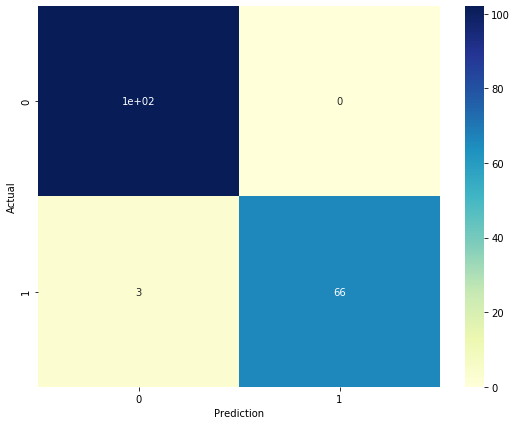

In [10]:
# confusion matrix
y_actual = pd.Series(df_test_model[target], name='Actual')
y_predicted = pd.Series(df_test_model["prediction"], name='Prediction')
confusion_matrix = pd.crosstab(y_actual, y_predicted)

fig, ax = plt.subplots(figsize=(9,7))
sn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [11]:
false_negatives[0]

,texture_mean,area_worst,smoothness_worst,concavity_mean,diagnosis,log_odds,prediction
40,21.58,787.9,0.1094,0.0311,1,-2.9564,0


In [12]:
false_negatives[1]

,texture_mean,area_worst,smoothness_worst,concavity_mean,diagnosis,log_odds,prediction
263,19.38,988.6,0.1084,0.04209,1,-1.36365,0


In [13]:
false_negatives[1]

,texture_mean,area_worst,smoothness_worst,concavity_mean,diagnosis,log_odds,prediction
263,19.38,988.6,0.1084,0.04209,1,-1.36365,0
